<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/Variance_intolerance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import np_utils

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c digit-recognizer

In [0]:
from zipfile import ZipFile
fn = "train.csv.zip"
with ZipFile(fn,'r')as zipfn:
  zipfn.extractall()

In [0]:
traindb = np.loadtxt('train.csv',delimiter =',', skiprows = 1)
xtrain = np.array(traindb[:,1:])
ylabel = np.array(traindb[:,0])
print(xtrain.shape)
print(ylabel.shape)

(42000, 784)
(42000, 10)


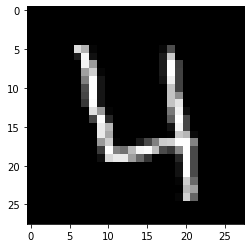

In [93]:
xtrain1 = xtrain / 255
ylabel1 = np_utils.to_categorical(ylabel)
print(xtrain1.shape)
print(ylabel1.shape)
plt.imshow(xtrain1[3].reshape(28,28), cmap = 'gray')
plt.show()

In [0]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [0]:
hidden = 1000
output = 10
lrate = 0.1

In [0]:
z1 = tf.layers.dense(x , hidden , activation = tf.nn.relu)
outlayer = tf.layers.dense(z1 , output , activation = tf.nn.softmax)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = outlayer , labels = ylabel1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lrate).minimize(loss)
prediction = tf.equal(tf.argmax(outlayer,1),tf.argmax(y,1))
init = tf.global_variables_initializer()

(4072, 784)


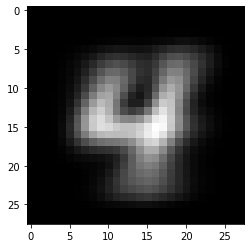

In [98]:
xtrain4 = xtrain1[ylabel == 4]
print(xtrain4.shape)
xreshape = xtrain4.reshape(-1,28,28)
pic = np.zeros((28,28))
pic1 = np.copy(pic)
for i in range(xreshape.shape[0]):
  pic1 = xreshape[i,:,:]
  pic = pic+pic1
testimg = (pic/xreshape.shape[0])
plt.imshow(testimg, cmap = 'gray')
plt.show()

In [99]:
sess = tf.Session()
sess.run(init)
for i in range(500):
  gh,lossy = sess.run([optimizer,loss],feed_dict = {x:xtrain1, y:ylabel1})
  if(i%100 == 0):
    print("loss at {2}/{1} : {0}".format(lossy,500,i))

testreshaped = testimg.reshape(1,784)
z = sess.run(outlayer,feed_dict = {x:testreshaped})
ypred = np.argmax(z,axis = 1)
print("test img prediction : {0}".format(ypred))


loss at 0/500 : 2.3032851219177246
loss at 100/500 : 1.9236871004104614
loss at 200/500 : 1.7776458263397217
loss at 300/500 : 1.7107455730438232
loss at 400/500 : 1.6844713687896729
test img prediction : [4]


(28, 28)


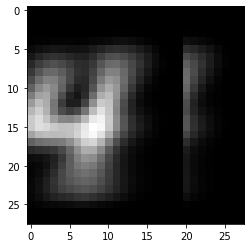

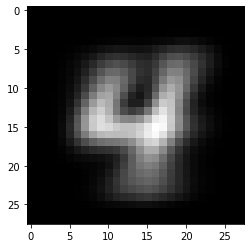

In [100]:
print(testimg.shape)
for i in range(testimg.shape[0]):
  if (i<10):
    testimg2[:,i] = testimg[:,i+8]
    testimg2 = np.clip(testimg2,0,1.0)
plt.imshow(testimg2, cmap = 'gray')
plt.show()

plt.imshow(testimg, cmap = 'gray')
plt.show()

In [101]:
timgreshaped4 = testimg2.reshape(1,784)
z1 = sess.run(outlayer,feed_dict = {x:timgreshaped4})
ypred1 = np.argmax(z1,axis = 1)
print("prediction : {0}".format(ypred1))

prediction : [0]
